# <center> Example usage of Market class </center>
author: Leandro Salemi <br> email: salemileandro@gmail.com

In [15]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit



import pynanz as pn

In [2]:
# Downloading data

tickers = ["AAPL", "AMZN", "USFD", "ARKF", "AIR.PA", "KO", "UAL"]
start = pd.Timestamp("2015-01-01")

mkt = pn.Market()

mkt.download(tickers=tickers, start=start, end=None, threshold_date=start)

mkt.data.head()

Skipping USFD starting at 2016-05-26 00:00:00
Skipping ARKF starting at 2019-02-04 00:00:00


AAPL                                              \
            adj close      close       high        low       open   
Date                                                                
2015-01-02  24.745996  27.332500  27.860001  26.837500  27.847500   
2015-01-05  24.048864  26.562500  27.162500  26.352501  27.072500   
2015-01-06  24.051123  26.565001  26.857500  26.157499  26.635000   
2015-01-07  24.388380  26.937500  27.049999  26.674999  26.799999   
2015-01-08  25.325432  27.972500  28.037500  27.174999  27.307501   

                            AIR.PA                                   ...  \
                 volume  adj close      close       high        low  ...   
Date                                                                 ...   
2015-01-02  212818400.0  36.627823  41.525002  41.959999  40.775002  ...   
2015-01-05  257142000.0  36.738083  41.650002  43.200001  41.064999  ...   
2015-01-06  263188400.0  37.589275  42.615002  43.750000  41.680000  ...   
2015-01-07  160423600.0  38.568367  43.724998  44.215000  42.810001  ...   
2015-01-08  237458000.0  39.882645  45.215000  45.500000  43.974998  ...   

                   KO                                          UAL             \
                 high        low       open      volume  adj close      close   
Date                                                                            
2015-01-02  42.400002  41.799999  42.259998   9921100.0  66.339996  66.339996   
2015-01-05  42.970001  42.080002  42.689999  26292600.0  66.150002  66.150002   
2015-01-06  42.939999  42.240002  42.410000  16897500.0  64.580002  64.580002   
2015-01-07  43.110001  42.580002  42.799999  13412300.0  65.529999  65.529999   
2015-01-08  43.570000  43.099998  43.180000  21743600.0  66.639999  66.639999   

                                                        
                 high        low       open     volume  
Date                                                    
2015-01-02  68.080002  65.709999  67.739998  6215000.0  
2015-01-05  67.349998  65.500000  66.870003  5033400.0  
2015-01-06  67.000000  63.110001  66.629997  6051700.0  
2015-01-07  66.110001  64.000000  64.959999  5135000.0  
2015-01-08  67.519997  65.410004  65.699997  6889500.0  

[5 rows x 30 columns]

In [3]:
### Saving and loading data
mkt.save("mkt.pkl")

y = pn.Market.load("mkt.pkl")

print("Equals ?", y.data.equals(mkt.data))

Equals ? True


<AxesSubplot:xlabel='Date'>

<Figure size 432x288 with 0 Axes>

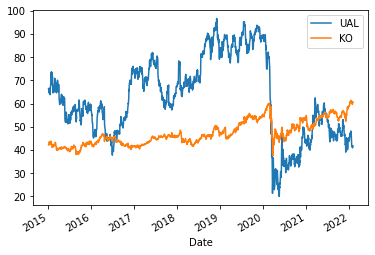

<Figure size 432x288 with 0 Axes>

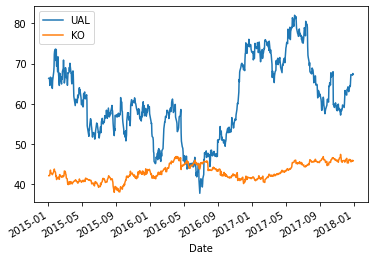

In [4]:
# Plotting the price evolution for two assets
plt.figure()
mkt[:, ["UAL", "KO"], "close"].plot()

# Plotting the price evolution for two assets only for 3 years
plt.figure()
mkt[pd.Timestamp("2015-01-01"):pd.Timestamp("2018-01-01"), ["UAL", "KO"], "close"].plot()

In [11]:
mkt[pd.Timestamp("2015-01-02"), :, "close"]

,AAPL,AIR.PA,AMZN,KO,UAL
Date,,,,,
2015-01-02,27.3325,41.525002,308.519989,42.139999,66.339996


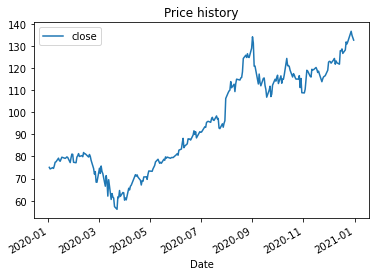

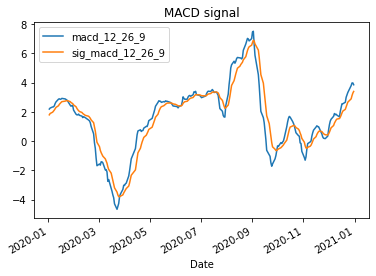

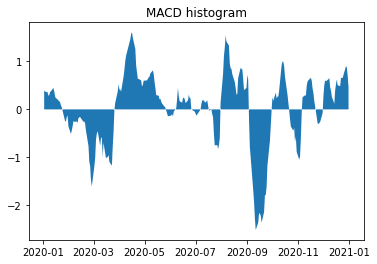

In [13]:
### Calculating some indicators like the MACD

mkt.macd()

mkt[pd.Timestamp("2020-01-01"):pd.Timestamp("2021-01-01"), "AAPL", "close"].plot()
plt.title("Price history")


mkt[pd.Timestamp("2020-01-01"):pd.Timestamp("2021-01-01"), "AAPL", ["macd_12_26_9", "sig_macd_12_26_9"]].plot()
plt.title("MACD signal")

hist =  mkt[pd.Timestamp("2020-01-01"):pd.Timestamp("2021-01-01"), "AAPL", "hist_macd_12_26_9"]

plt.figure()
plt.title("MACD histogram")
plt.fill_between(hist.index, hist["hist_macd_12_26_9"].values, color=None, cmap="seismic")

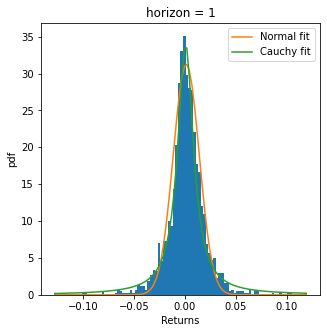

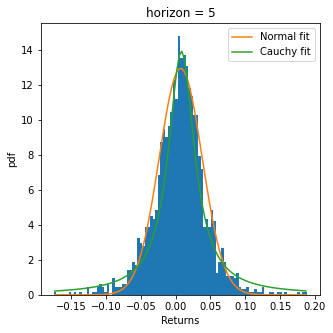

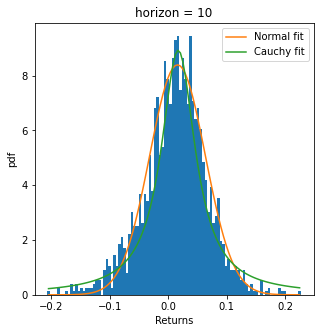

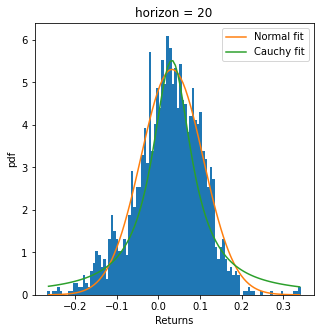

In [14]:
#Looking at the return distribution as a function of the return horizon

def gaussian(x, mu, sigma):
    fac = 1.0 / (sigma * np.sqrt(2.0 * np.pi))
    return fac * np.exp(-0.5 * np.square((x-mu)/sigma))

def cauchy(x, x0, gamma):
    y = np.pi * gamma * ( 1.0 + np.square((x-x0)/gamma) )
    y = 1.0 / y
    return y


for horizon in [1, 5, 10, 20]:
    plt.figure(figsize=(5,5))
    plt.title("horizon = %d" % horizon)
    
    mkt.past_return(horizon=horizon)
    # By default a DataFrame is returned !!!
    df = mkt[:, "AAPL", "past_return_%d" % horizon]["past_return_%d" % horizon]
    y = plt.hist(df.values, density=True, bins=100)
    y, x = y[0], y[1]
    x = np.array(0.5 * (x[1:] + x[:-1]))
    y = np.array(y)


    
    coef, cov  = curve_fit(gaussian, x, y, [0.01, 1.0])
    plt.plot(x, gaussian(x, *coef), label="Normal fit")

    coef, cov  = curve_fit(cauchy, x, y, [0.01, 1.0])
    plt.plot(x, cauchy(x, *coef), label="Cauchy fit")

    plt.legend()
    plt.xlabel("Returns")
    _ = plt.ylabel("pdf")

The distribution of the returns is neither perfectly gaussian (normal) nor laurentzian (cauchy).